## Classification.  Handling Imbalanced Data with downsampling

## Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
pd.set_option('display.max_rows', 200)

In [2]:
churnData = pd.read_csv("DATA_Customer-Churn.csv")

In [3]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


## Check the datatypes of all the columns in the data

In [4]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Converting TotalCharges column into numeric type

In [5]:
#churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"])
#We find some errors on that column (empty values, not NaN)

In [6]:
churnData.loc[488, 'TotalCharges']

' '

In [7]:
#If ‘coerce’, then invalid parsing will be set as NaN.
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors='coerce')

### Check for null values and replace them

In [8]:
churnData.isnull().values.any()

True

In [9]:
round(churnData.isna().sum()/len(churnData),4)*100

gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
tenure              0.00
PhoneService        0.00
OnlineSecurity      0.00
OnlineBackup        0.00
DeviceProtection    0.00
TechSupport         0.00
StreamingTV         0.00
StreamingMovies     0.00
Contract            0.00
MonthlyCharges      0.00
TotalCharges        0.16
Churn               0.00
dtype: float64

In [10]:
churnData=churnData.fillna(churnData.mean())

In [11]:
churnData["TotalCharges"].mean()

2283.3004408418697

In [12]:
churnData["TotalCharges"][churnData["TotalCharges"] > 0].mean()

2283.3004408418697

In [13]:
round(churnData.isna().sum()/len(churnData),4)*100

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [14]:
churnData["Churn"] = churnData["Churn"].replace(('Yes','No'),(1,0))
churnData["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

## Check for imbalance data

In [15]:
churnData["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

- Our target value is not good balanced

### Downsampling method to balance data
<b>In downsampling, we randomly sample without replacement from the majority class

In [16]:
category_0 = churnData[churnData["Churn"] == 0]
category_1 = churnData[churnData["Churn"] == 1]

In [17]:
category_0

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,0
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,0
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,0
6,Male,0,No,Yes,22,Yes,No,Yes,No,No,Yes,No,Month-to-month,89.10,1949.40,0
7,Female,0,No,No,10,No,Yes,No,No,No,No,No,Month-to-month,29.75,301.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,21.15,1419.40,0
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,0


In [18]:
len(category_0), len(category_1)

(5174, 1869)

<b> Take a random sample of majority class as long as minority class

In [19]:
category_0_down = category_0.sample(len(category_1))
print(category_0_down.shape)
print(category_1.shape)

(1869, 16)
(1869, 16)


In [20]:
data = pd.concat([category_0_down, category_1], axis=0)
#shuffling the data to not have a lot 0 at the beginning and a lot of 1 at the  
#it's important to shuffle now to split on train and test after
data = data.sample(frac=1)  #frac 1 means don't subset it, just shuffle it


In [21]:
category_1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,1
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,1
5,Female,0,No,No,8,Yes,No,No,Yes,No,Yes,Yes,Month-to-month,99.65,820.50,1
8,Female,0,Yes,No,28,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-month,104.80,3046.05,1
13,Male,0,No,No,49,Yes,No,Yes,Yes,No,Yes,Yes,Month-to-month,103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,No,No,Yes,Yes,No,One year,59.80,727.80,1
7026,Female,0,No,No,9,Yes,No,No,No,No,No,No,Month-to-month,44.20,403.35,1
7032,Male,1,No,No,1,Yes,No,No,No,No,No,No,Month-to-month,75.75,75.75,1
7034,Female,0,No,No,67,Yes,Yes,Yes,Yes,No,Yes,No,Month-to-month,102.95,6886.25,1


In [22]:
data['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [23]:
round(data.isna().sum()/len(data),4)*100

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

### Split the data into a training set and a test set just using 4 features

- tenure: Number of months the customer has stayed with the company (Multiple different numeric values)
- SeniorCitizen: Whether the client is a senior citizen or not ( 0, 1).
- MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values).
- TotalCharges: The total amount charged to the customer (Multiple different numeric values).

In [24]:
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges','TotalCharges']]
y = data["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [25]:
X_test

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
6887,35,0,24.30,821.60
635,65,0,105.50,6985.65
3663,9,0,88.40,788.60
5152,55,0,25.65,1388.00
3102,5,0,54.20,308.25
...,...,...,...,...
3973,43,0,60.40,2640.55
6862,4,1,88.85,372.45
6639,50,0,103.40,5236.40
2324,15,1,83.05,1258.30


## 01. Logistic Regression model

In [26]:
log_model = LogisticRegression() 

### Scale the features 

In [27]:
#transform data
trans = StandardScaler()
trans.fit(X_train)
X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

- Change again X_train_mod and X_test mod to dataframe

In [28]:
X_train_mod = pd.DataFrame(X_train_mod, columns= X.columns)
X_test_mod = pd.DataFrame(X_test_mod, columns= X.columns)

In [29]:
X_train_mod.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,0.098347,2.089986,-0.976064,-0.400374
1,-0.981675,-0.478472,0.300785,-0.784089
2,-0.981675,-0.478472,0.342937,-0.799815
3,-1.064753,2.089986,0.158523,-0.866057
4,-1.023214,-0.478472,0.711766,-0.816799


In [30]:
#Fitting data
log_model.fit(X_train_mod, y_train)

LogisticRegression()

### Make Predictions

In [31]:
y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

In [32]:
y_pred_train_log

array([0, 1, 1, ..., 1, 0, 1])

In [33]:
y_pred_test_log

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,

## Confusion Matrix

- We have to state that our positive label is Yes (and negative label is No), instead of 0, which is the default value

,Error_metric,Train,Test
0,Accuracy,0.728763,0.762032
1,Precision,0.726261,0.770774
2,Recall,0.738349,0.732970


Confusion matrix for the train set
[[1070  418]
 [ 393 1109]]


/home/dani/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


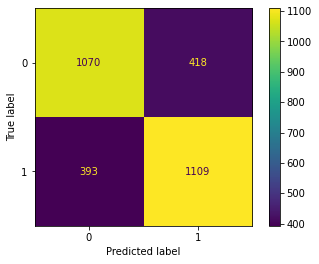



Confusion matrix for the test set
[[301  80]
 [ 98 269]]


/home/dani/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


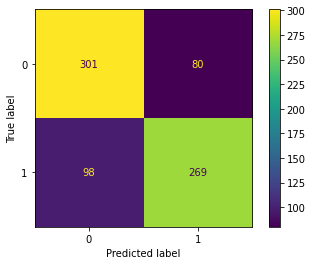

In [34]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label =1),
                                         recall_score(y_train, y_pred_train_log,pos_label = 1)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label = 1),
                                        recall_score(y_test, y_pred_test_log,pos_label = 1
                                                    )]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## 02. KNN CLASSIFIER


In [35]:
neigh = KNeighborsClassifier(n_neighbors=25)
neigh.fit(X_train_mod, y_train)  #X_train_mod is the scaled version

KNeighborsClassifier(n_neighbors=25)

### Make Predictions on KNN

In [36]:
y_pred_train_knn = neigh.predict(X_train_mod)
y_pred_test_knn = neigh.predict(X_test_mod)

In [37]:
y_pred_train_knn

array([1, 1, 1, ..., 1, 1, 1])

In [38]:
y_pred_test_knn

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,

### Confusion matrix on KNN with k=25

,Error_metric,Train,Test
0,Accuracy,0.755184,0.740642
1,Precision,0.747748,0.724675
2,Recall,0.773635,0.760218


Confusion matrix for the train set
[[1096  392]
 [ 340 1162]]


/home/dani/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


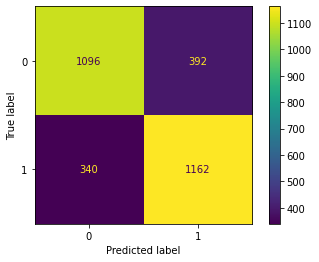



Confusion matrix for the test set
[[275 106]
 [ 88 279]]


/home/dani/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


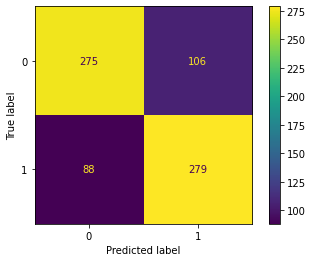

In [39]:
performance_KNN = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn,pos_label =1),
                                         recall_score(y_train, y_pred_train_knn,pos_label = 1)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn,pos_label = 1),
                                        recall_score(y_test, y_pred_test_knn,pos_label = 1
                                                    )]})

display(performance_KNN)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(neigh,X_test_mod,y_test, values_format = 'd')
plt.show()

In [40]:
# make predictions
y_pred_train_knn = neigh.predict(X_train_mod)
y_pred_test_knn  = neigh.predict(X_test_mod)

#performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
#performance_knn

In [41]:
y_pred_train_knn

array([1, 1, 1, ..., 1, 1, 1])

- Let's make a for loop to try others value for k neighbours

In [42]:
full_knn = pd.DataFrame()

models = {'k': [] }

for k in range(2,80):

    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train_mod, y_train)

    models['k'] = [k, neigh]

    y_pred_train_knn = neigh.predict(X_train_mod)
    y_pred_test_knn  = neigh.predict(X_test_mod)
    temp_knn = pd.DataFrame({'k': [k]*3, 'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn,pos_label =1),
                                         recall_score(y_train, y_pred_train_knn,pos_label = 1)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn,pos_label = 1),
                                        recall_score(y_test, y_pred_test_knn,pos_label = 1
                                                    )]})
    full_knn = pd.concat([full_knn,temp_knn], axis=0)

full_knn

,k,Error_metric,Train,Test
0,2,Accuracy,0.829431,0.684492
1,2,Precision,0.998994,0.758893
2,2,Recall,0.661119,0.523161
0,3,Accuracy,0.835117,0.725936
1,3,Precision,0.833885,0.720109
...,...,...,...,...
1,78,Precision,0.739848,0.730077
2,78,Recall,0.776298,0.773842
0,79,Accuracy,0.749498,0.751337
1,79,Precision,0.735460,0.730280


In [43]:
### Best accuracy
full_knn[full_knn['Error_metric'] == 'Accuracy']

,k,Error_metric,Train,Test
0,2,Accuracy,0.829431,0.684492
0,3,Accuracy,0.835117,0.725936
0,4,Accuracy,0.800669,0.712567
0,5,Accuracy,0.797993,0.727273
0,6,Accuracy,0.784281,0.729947
0,7,Accuracy,0.782274,0.732620
0,8,Accuracy,0.777258,0.740642
0,9,Accuracy,0.772910,0.736631
0,10,Accuracy,0.776254,0.732620
0,11,Accuracy,0.774916,0.731283


In [44]:
full_knn_2 = full_knn.melt(id_vars=['k','Error_metric'])
full_knn_2

,k,Error_metric,variable,value
0,2,Accuracy,Train,0.829431
1,2,Precision,Train,0.998994
2,2,Recall,Train,0.661119
3,3,Accuracy,Train,0.835117
4,3,Precision,Train,0.833885
...,...,...,...,...
463,78,Precision,Test,0.730077
464,78,Recall,Test,0.773842
465,79,Accuracy,Test,0.751337
466,79,Precision,Test,0.730280


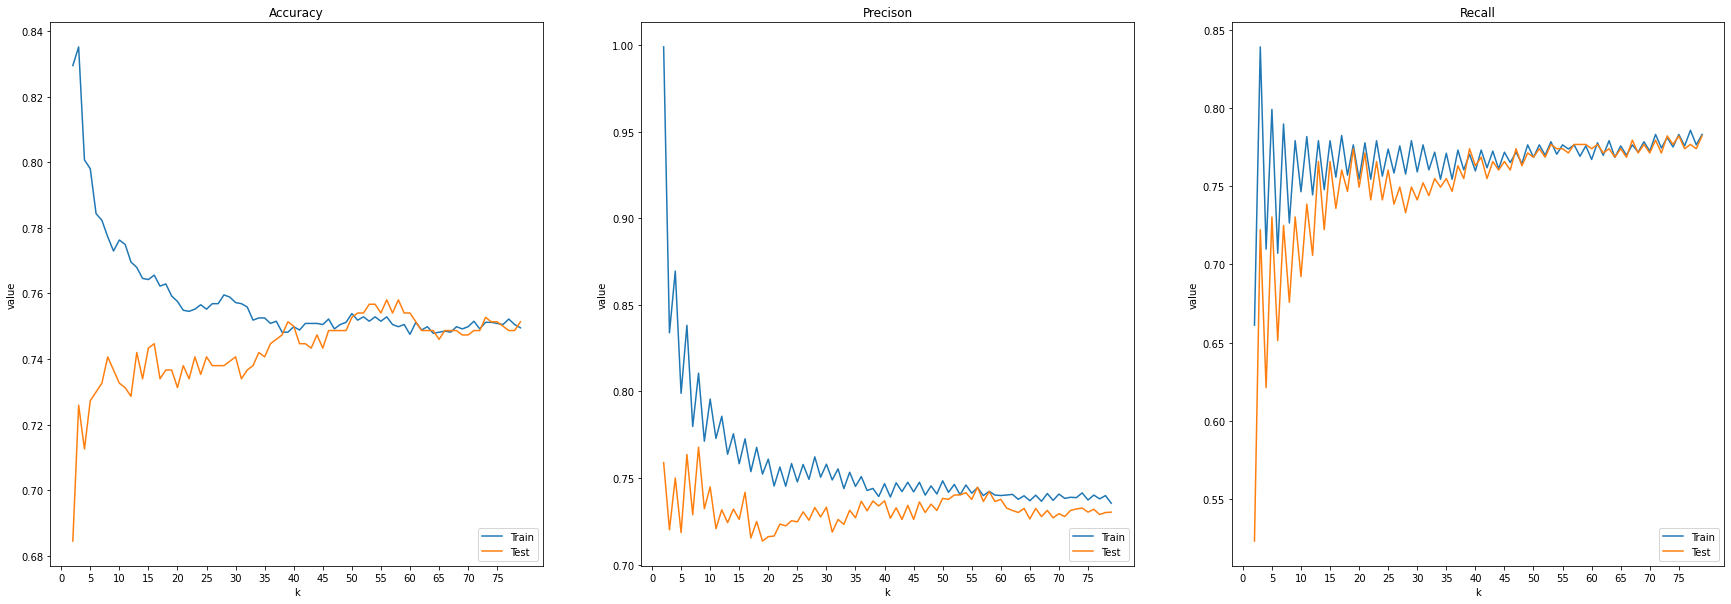

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#metrics = ['Mean error',]'Mean absolute error',...]

fig, ax = plt.subplots(1,3, figsize=(30,10))
sns.lineplot(x = 'k', y = 'value', data = full_knn_2[full_knn_2['Error_metric'] == 'Accuracy'], hue = 'variable', ax = ax[0])
ax[0].set_xticks((np.arange(0, 80, 5)))
ax[0].set_title("Accuracy")
ax[0].legend(loc='lower right')

sns.lineplot(x = 'k', y = 'value', data = full_knn_2[full_knn_2['Error_metric'] == 'Precision'], hue = 'variable', ax = ax[1])
ax[1].set_xticks((np.arange(0, 80, 5)))
ax[1].set_title("Precison")
ax[1].legend(loc='lower right')

sns.lineplot(x = 'k', y = 'value', data = full_knn_2[full_knn_2['Error_metric'] == 'Recall'], hue = 'variable', ax = ax[2])
ax[2].set_xticks((np.arange(0, 80, 5)))
ax[2].set_title("Recall")
ax[2].legend(loc='lower right')

In [46]:
full_knn_2[full_knn_2['k'] == 40]

,k,Error_metric,variable,value
114,40,Accuracy,Train,0.749833
115,40,Precision,Train,0.746728
116,40,Recall,Train,0.759654
348,40,Accuracy,Test,0.750000
349,40,Precision,Test,0.736842
350,40,Recall,Test,0.762943


In [47]:
full_knn_2[full_knn_2['k'] == 25]

,k,Error_metric,variable,value
69,25,Accuracy,Train,0.755184
70,25,Precision,Train,0.747748
71,25,Recall,Train,0.773635
303,25,Accuracy,Test,0.740642
304,25,Precision,Test,0.724675
305,25,Recall,Test,0.760218


In [48]:
full_knn_2[full_knn_2['k'] == 26]

,k,Error_metric,variable,value
72,26,Accuracy,Train,0.756856
73,26,Precision,Train,0.757818
74,26,Recall,Train,0.758322
306,26,Accuracy,Test,0.737968
307,26,Precision,Test,0.730458
308,26,Recall,Test,0.738420


For the moment I'll say 40 k

## 03. DECISION TREE

In [49]:
tree = DecisionTreeClassifier(max_depth=3)

<b> We don't need to use scaled data on decision trees!!

In [50]:
tree.fit(X_train, y_train)

y_pred_train_dt = tree.predict(X_train)
y_pred_test_dt = tree.predict(X_test)


performance_dt = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

In [51]:
display(performance_dt)

,Error_metric,Train,Test
0,Accuracy,0.726756,0.727273
1,Precision,0.693612,0.685649
2,Recall,0.816911,0.820163


### Confusion matrix on decision tree

Confusion matrix for the train set
[[ 946  275]
 [ 542 1227]]


/home/dani/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for the test set
[[243  66]
 [138 301]]


/home/dani/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


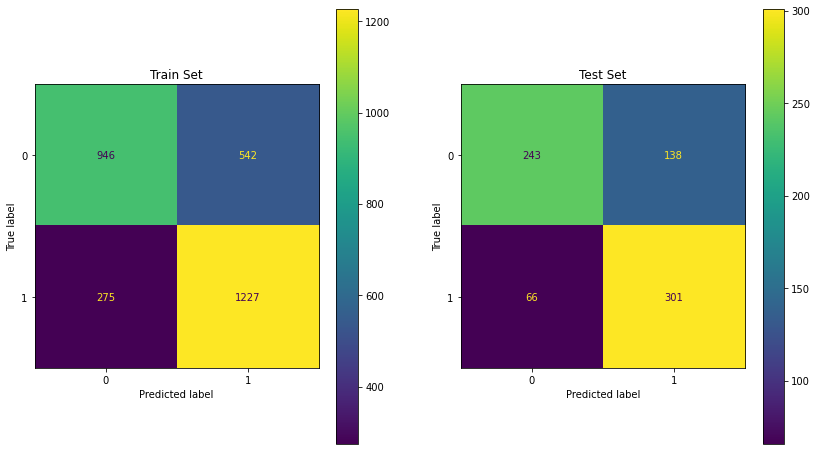

In [80]:
fig, ax = plt.subplots(1,2, figsize=(14,8))

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(tree,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

print("Confusion matrix for the test set")

print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(tree,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

<BarContainer object of 4 artists>

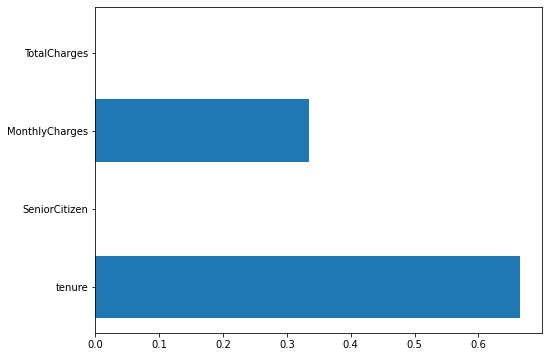

In [78]:
plt.figure(figsize=(8,6))
plt.barh(X.columns,tree.feature_importances_)

In [54]:
X["tenure"].unique()

array([ 2, 68, 50,  8, 34, 69, 37, 17, 19,  5,  4, 44, 32, 33, 26, 47, 41,
       42,  7, 22, 11, 72,  1, 55, 66, 46, 64, 54, 31, 25, 21, 43,  6,  3,
        9, 23, 27, 58, 57, 24, 71, 13, 52, 10, 14, 70, 51,  0, 53, 30, 20,
       45, 67, 35, 49, 63, 36, 16, 38, 39, 12, 60, 18, 15, 61, 28, 40, 29,
       59, 56, 62, 48, 65])

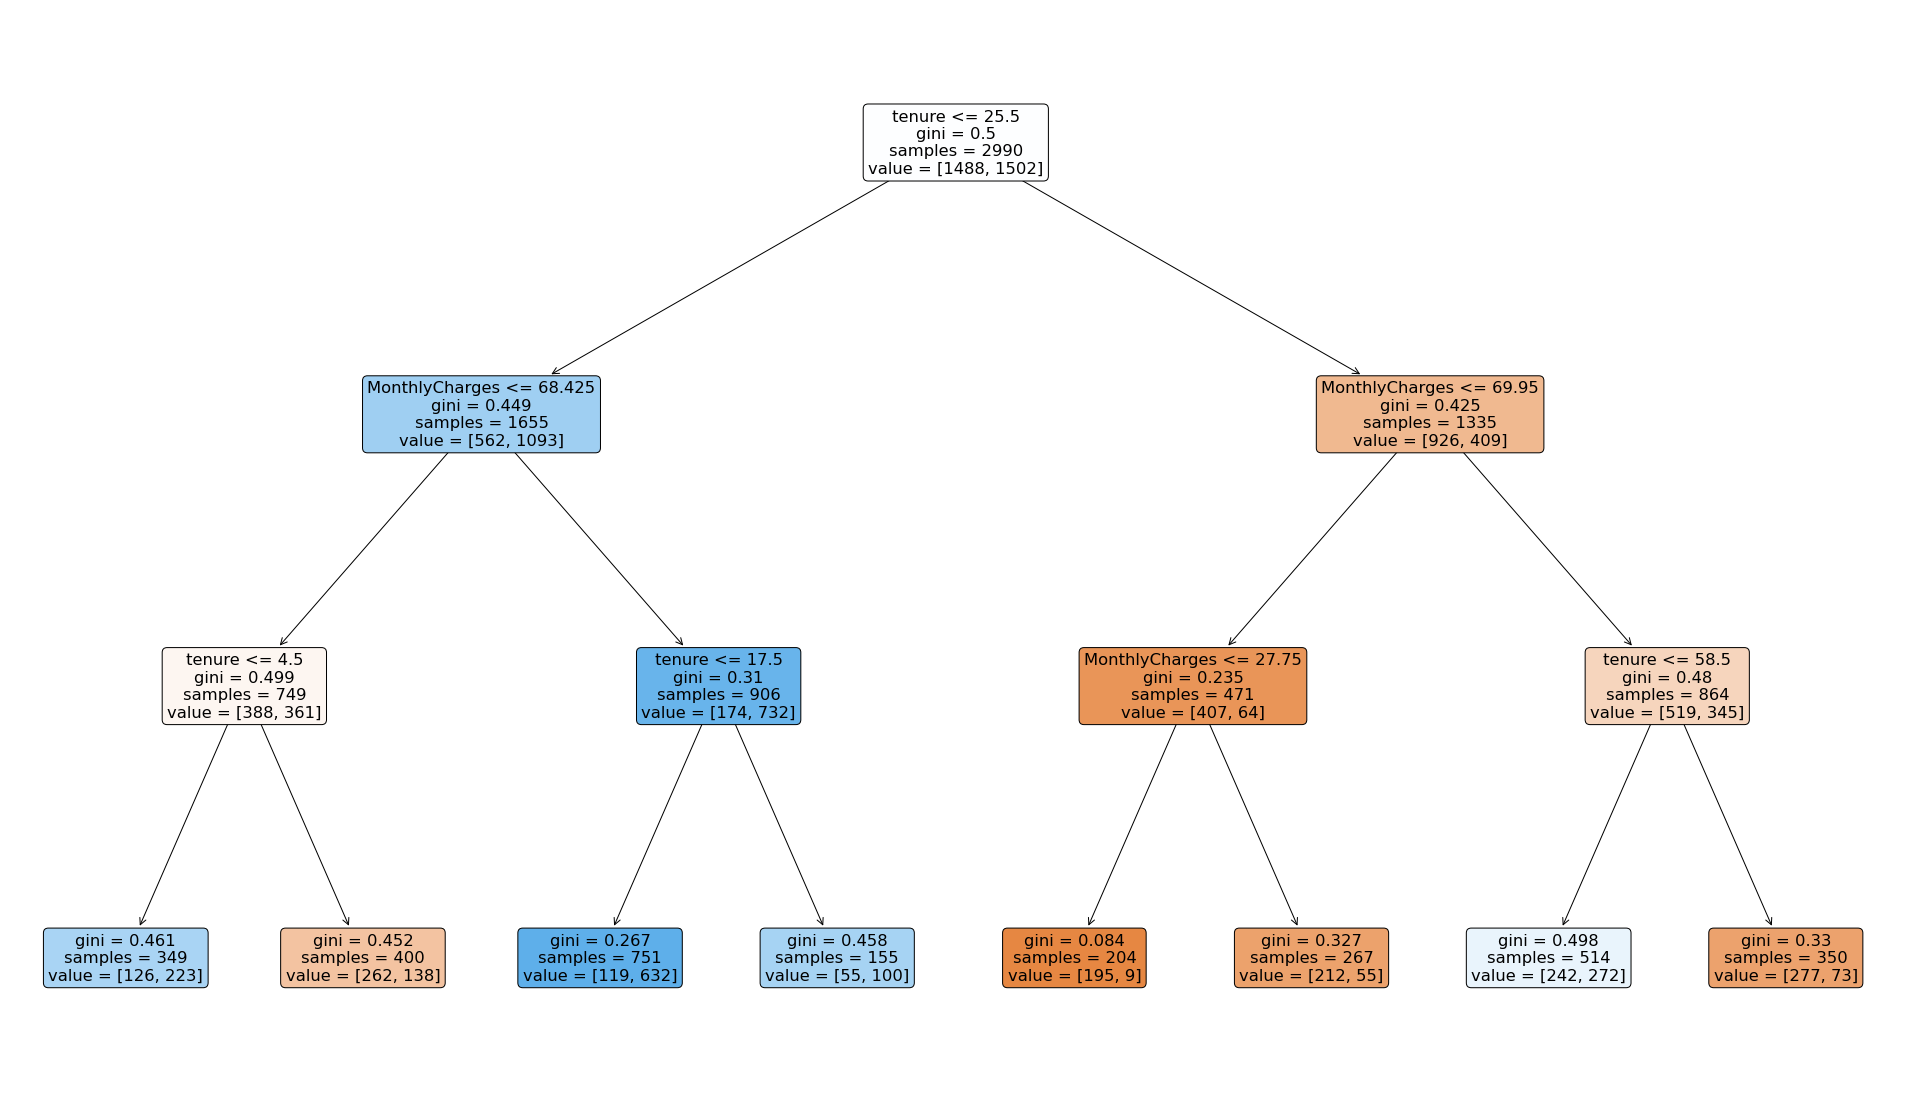

In [55]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(tree,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

In [56]:
len(X_train)

2990

In [57]:
X_train["tenure"].mean()

27.632441471571905

In [58]:
X_train.describe()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
count,2990.000000,2990.000000,2990.000000,2990.000000
mean,27.632441,0.186288,68.087090,2048.739315
std,24.077625,0.389404,28.473265,2187.795142
min,0.000000,0.000000,18.400000,18.850000
25%,5.000000,0.000000,45.862500,267.362500
50%,20.000000,0.000000,74.850000,1152.975000
75%,49.000000,0.000000,90.550000,3218.250000
max,72.000000,1.000000,118.600000,8670.100000


We see that senior citizen doesn't affect (feature importance is 0), let's try not include it on the decision tree

In [59]:
performance_log

,Error_metric,Train,Test
0,Accuracy,0.728763,0.762032
1,Precision,0.726261,0.770774
2,Recall,0.738349,0.732970


In [60]:
performance_KNN

,Error_metric,Train,Test
0,Accuracy,0.755184,0.740642
1,Precision,0.747748,0.724675
2,Recall,0.773635,0.760218


In [61]:
performance_dt

,Error_metric,Train,Test
0,Accuracy,0.726756,0.727273
1,Precision,0.693612,0.685649
2,Recall,0.816911,0.820163


### K-fold cross validation on your models 

<b>Log model

In [62]:
#log_model
log_scores=cross_val_score(log_model, X_train_mod, y_train, cv=10)
log_scores

array([0.73578595, 0.72575251, 0.73578595, 0.73913043, 0.76588629,
       0.7090301 , 0.75250836, 0.66220736, 0.71237458, 0.73244147])

In [63]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (log_scores.mean(), log_scores.std()))

0.73 accuracy with a standard deviation of 0.03


<b>Knn classifier

In [64]:
#neigh
neigh_scores=cross_val_score(neigh, X_train_mod, y_train, cv=10)
neigh_scores

array([0.74247492, 0.73913043, 0.74916388, 0.75585284, 0.78929766,
       0.73244147, 0.76254181, 0.67558528, 0.72909699, 0.7458194 ])

In [65]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (neigh_scores.mean(), neigh_scores.std()))

0.74 accuracy with a standard deviation of 0.03


<b>Decision tree

In [66]:
#tree
tree_scores=cross_val_score(tree, X_train, y_train, cv=10)
tree_scores

array([0.68227425, 0.7090301 , 0.69565217, 0.73244147, 0.72575251,
       0.73578595, 0.73244147, 0.70234114, 0.71571906, 0.71571906])

In [67]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (tree_scores.mean(), tree_scores.std()))

0.71 accuracy with a standard deviation of 0.02


In [68]:
model_pipeline = [log_model, neigh, tree]
model_names = ['LOG', 'KNN', 'DT']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'LOG': 0.7270903010033444, 'KNN': 0.677257525083612, 'DT': 0.714046822742475}


## 04. RANDOM FOREST CLASSIFIER

<b> We don't need to use scaled data on decision trees!!

In [71]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=1, min_samples_split=2, n_estimators=100)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.7133779264214046


### Tune the hyper parameters with gridsearch

In [73]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50,100,500],  #numbers of models
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
    ##'max_samples' : ['None', 0.5],
    ##'max_depth':[3,5,10],
    ## 'bootstrap':[True,False] 
    }
clf = RandomForestClassifier(random_state=100)

In [74]:
grid_search = GridSearchCV(clf, param_grid, cv=10,return_train_score=True,n_jobs=-1,)

In [75]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [76]:
grid_search.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

<b> Using the best parameters

In [81]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=2, min_samples_split=2, n_estimators=100)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.723076923076923
